In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy

import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import geopandas
import cartopy.io.shapereader as shpreader
import shapely

from matplotlib.patches import Rectangle, Patch
from global_land_mask import globe

import xarray as xr

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    'text.latex.preamble': r'\newcommand{\mathdefault}[1][]{}'
})



In [2]:
df = pd.read_csv('../data/2_merged_da_data.csv')
df.head()

,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,precip_da_cat,temp_da_cat,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land
0,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
1,-88.75,-176.25,-88.75,-176.25,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
2,-88.75,-173.75,-88.75,-173.75,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
3,-88.75,-171.25,-88.75,-171.25,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False
4,-88.75,-168.75,-88.75,-168.75,-87.5,-167.5,NaN,NaN,NaN,NaN,...,0.0,0.0,0,0,0,0.0,add,0.0,1685.654015,False


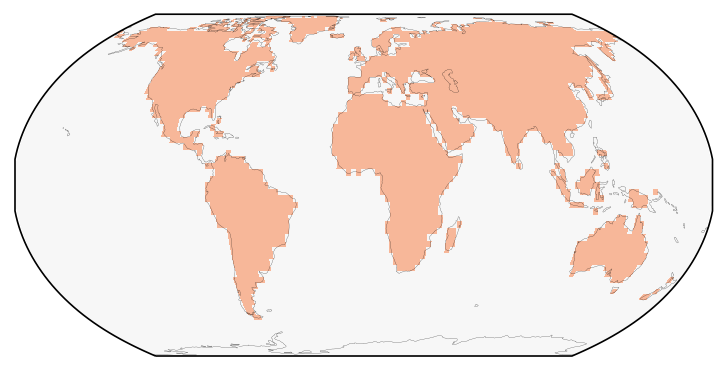

In [3]:
## Plot land

fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

n = np.array(df.is_land).reshape(len(df.LAT.unique()),len(df.LON.unique()))
mesh = ax.pcolormesh(
    df.LON.unique(),
    df.LAT.unique(),
    n,
    cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
zm = np.ma.masked_less(n, 2)

ax.pcolor(
    df.LON.unique(),
    df.LAT.unique(),
    zm,
    hatch="//////",
    #hatch="......",
    transform=ccrs.PlateCarree(),
    alpha=0.
)

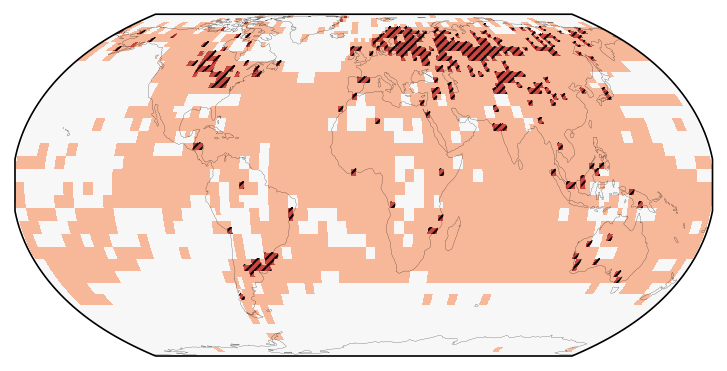

In [4]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)



n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
mesh = ax.pcolormesh(
    df.LON.unique(),
    df.LAT.unique(),
    n,
    cmap=plt.cm.get_cmap('RdBu_r',7), vmin=-3, vmax=3,
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
zm = np.ma.masked_less(n, 2)

ax.pcolor(
    df.LON.unique(),
    df.LAT.unique(),
    zm,
    hatch="//////",
    #hatch="......",
    transform=ccrs.PlateCarree(),
    alpha=0.
)

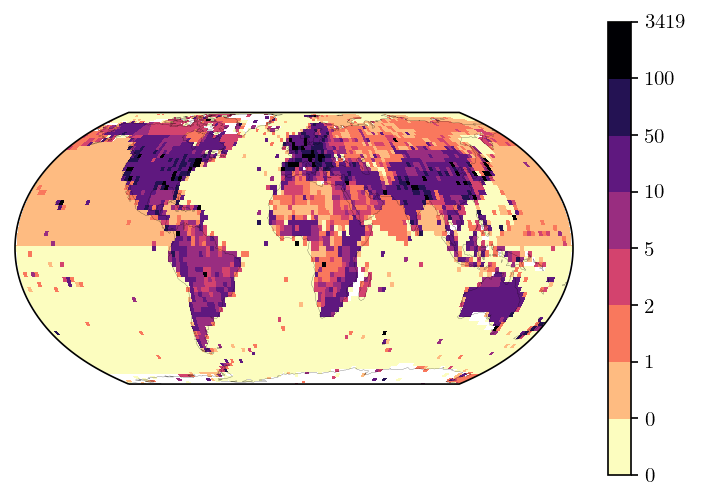

In [5]:

fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

n = np.array(df.total_study_prop).reshape(len(df.LAT.unique()),len(df.LON.unique()))
#vm = round(n.max()/10*10)
vm = n.max()
n[n==0] = np.nan

bounds = np.array([0,0.5,1,2.5,5,10,50,100,vm])


mesh = ax.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
   #norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
    norm = mpl.colors.BoundaryNorm(bounds,256),
    #cmap=plt.cm.get_cmap('YlOrBr',vm/3-1), 
    #cmap = "YlOrBr",
    cmap = "magma_r",
    transform=ccrs.PlateCarree(),
    #alpha=0.5
)
cbar = plt.colorbar(mesh)

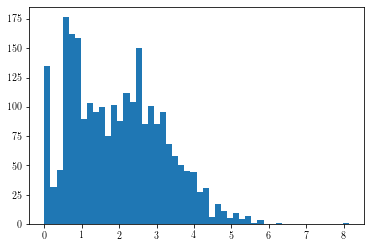

In [6]:
plt.hist(np.log(df[df['is_land']==True].total_study_prop+1),bins=50)
plt.show()

median 5.6421558095165185
mean 16.3259702601825
q2 1.414596003019768


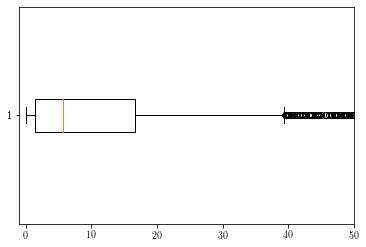

In [7]:
fig, ax = plt.subplots()
ax.boxplot(df[df['is_land']==True].total_study_prop, vert=False)
ax.set_xlim(xmax=50, xmin=-1)
print("median", df[df['is_land']==True].total_study_prop.median())
print("mean", df[df['is_land']==True].total_study_prop.mean())
print("q2", df[df['is_land']==True].total_study_prop.quantile(.25))

In [8]:
print(df[df['is_land']==True].total_study_prop.quantile(np.linspace(0,1,5)))


0.00       0.000000
0.25       1.414596
0.50       5.642156
0.75      16.612944
1.00    3418.554764
Name: total_study_prop, dtype: float64


In [9]:
print(df[df['is_land']==True].total_study_prop.quantile(np.linspace(0,1,11)))


0.0       0.000000
0.1       0.773252
0.2       1.096498
0.3       1.890276
0.4       3.217734
0.5       5.642156
0.6       9.070053
0.7      12.651331
0.8      20.525560
0.9      36.863491
1.0    3418.554764
Name: total_study_prop, dtype: float64


In [10]:
lots = 20
little = 5


#lots = 5
#little =1

def cat_evidence(df, lots, little):

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['total_study_prop']<little),"evidence_cat"
    ] = 1

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['total_study_prop']>=little),"evidence_cat"
    ] = 2

    df.loc[
        (abs(df['n_da_impacts'])>0) & (df['total_study_prop']>=lots),"evidence_cat"
    ] = 3

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['total_study_prop']<little),"evidence_cat"
    ] = 4

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['total_study_prop']>=little),"evidence_cat"
    ] = 5

    df.loc[
        (abs(df['n_da_impacts'])==0) & (df['total_study_prop']>=lots),"evidence_cat"
    ] = 6
    
    return df

df = cat_evidence(df, lots, little)

In [11]:
area_sums = df[df['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

pop_sums = df[df['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()

pop_sums



,evidence_cat,n_da_impacts,population,prop
0,1.0,1,6.152788e+08,0.094293
1,1.0,2,9.176414e+07,0.014063
2,2.0,1,1.521942e+09,0.233241
3,2.0,2,1.250496e+08,0.019164
4,3.0,1,2.837600e+09,0.434868
5,3.0,2,3.589044e+08,0.055003
6,4.0,0,9.913949e+07,0.015193
7,5.0,0,8.510916e+07,0.013043
8,6.0,0,7.904073e+08,0.121132


In [12]:
area_sums

,evidence_cat,n_da_impacts,area,prop
0,1.0,1,3.791335e+07,0.275081
1,1.0,2,6.718836e+06,0.048749
2,2.0,1,3.756307e+07,0.272540
3,2.0,2,3.594278e+06,0.026078
4,3.0,1,1.969041e+07,0.142864
5,3.0,2,5.322657e+06,0.038619
6,4.0,0,1.278249e+07,0.092744
7,5.0,0,9.578649e+06,0.069498
8,6.0,0,4.662304e+06,0.033827


Text(0, 0.5, 'Proportion of population')

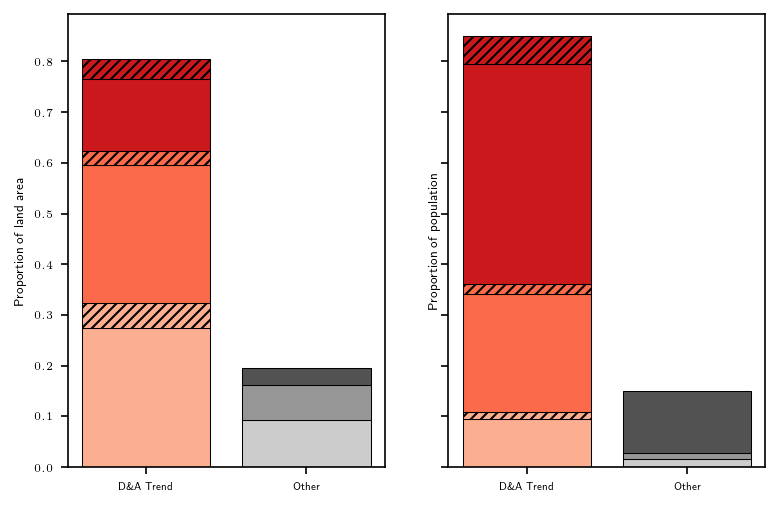

In [13]:
fig, axs = plt.subplots(1,2,dpi=150, sharey=True)

ax = axs[0]

bottoms = {0: 0.0, 1: 0.0}

hatch_types = ["","","/////"]

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
colors = reds + greys 

with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            ax.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
            
ax.set_xticks([0,1])
ax.set_xticklabels(["D\&A Trend", "Other"], fontsize=5)

ax.tick_params(axis="y",labelsize=5)

ax.set_ylabel("Proportion of land area",fontsize=6)
            
ax = axs[1]
            
bottoms = {0: 0.0, 1: 0.0}
            
with mpl.rc_context(rc={'hatch.linewidth': 2}):

    for i, (name, group) in enumerate(pop_sums.groupby('evidence_cat')):
        x = name//4
        for j, group in group.groupby('n_da_impacts'):
            y = group['prop'].values[0]
            ax.bar(
                x,y, bottom=bottoms[x], 
                color=colors[i], hatch=hatch_types[j],
                edgecolor="black",
                linewidth=0.5
            )
            bottoms[x]+=y
    
ax.set_xticks([0,1])
ax.set_xticklabels(["D\&A Trend", "Other"], fontsize=5)

ax.tick_params(axis="y",labelsize=5)

ax.set_ylabel("Proportion of population",fontsize=6)

In [14]:
area_sums[area_sums['evidence_cat'].isin([1,2,3])]['prop'].sum()

0.8039307797904752

In [15]:
pop_sums[pop_sums['evidence_cat'].isin([1,2,3])]['prop'].sum()

0.8506318994457589

In [16]:
area_sums[area_sums['evidence_cat'].isin([2,3])]['prop'].sum()

0.4801009404616443

In [17]:
pop_sums[pop_sums['evidence_cat'].isin([2,3])]['prop'].sum()

0.7422760669209416

In [18]:
area_sums[area_sums['evidence_cat'].isin([1])]['prop'].sum()

0.32382983932883097

In [19]:
pop_sums[pop_sums['evidence_cat'].isin([1])]['prop'].sum()

0.10835583252481724

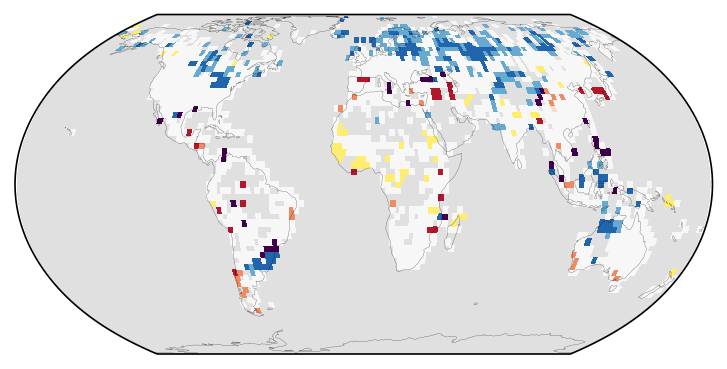

In [20]:
fig = plt.figure(dpi=150)

ax = plt.subplot(projection=ccrs.EqualEarth())

def plot_da(df, ax, da_var, colors=['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]):
    
    if "precip" not in da_var:
        colors.reverse()
    
    ax.coastlines(lw=0.1)

    bn = np.zeros((len(df.LAT.unique()), len(df.LON.unique())))
    bn+=1
    mesh = ax.pcolormesh(
        df.LON.unique(),#-degrees*0.5,
        df.LAT.unique(),#-degrees*0.5,
        bn,
        cmap = mpl.colors.ListedColormap(["#e0e0e0"]),
        transform=ccrs.PlateCarree(),
    )
    
    n = np.array(df[da_var]).reshape(len(df.LAT.unique()),len(df.LON.unique()))
    mesh = ax.pcolormesh(
        df.LON.unique(),
        df.LAT.unique(),
        n,
        cmap=mpl.colors.ListedColormap(colors),
        vmin=-4, vmax=4,
        transform=ccrs.PlateCarree(),
    )
    
    return mesh
    
plot_da(df, ax, 'updated_precip')

In [21]:
shp_ndf_df = pd.read_csv('../data/2_country_data.csv')

(-4.0, 4.0)


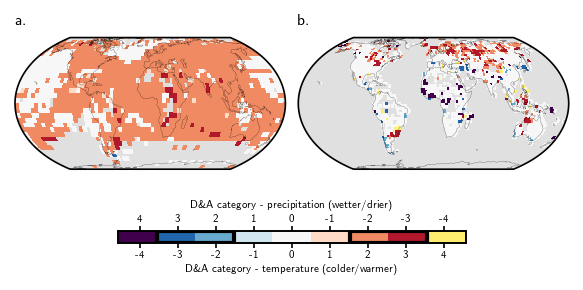

In [22]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,2), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,1,1]
h_r = [1,1,0.5]#,0.1] * 2 + [1.7,0.3,0.3,.1]
gs = fig.add_gridspec(3, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.85)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0:2,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp')

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0:2,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip')

## Cbar
cax = plt.subplot(gs[2,1:3])

def double_cbar(mesh, cax, frac):
    cax.axis('off')

    cax = cax.inset_axes([0.0,(1-frac)*0.5,1,frac])

    #cax.axis('off')
    cax2 = cax.twiny()
    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
        ticks=np.linspace(-3.5,3.5,9),
    )
    cax.set_xticklabels(np.arange(-4,5))


    
    
    cax2.set_xlim(-4,4)
    cax2.set_xticks(np.linspace(-3.5,3.5,9))
    cax2.set_xticklabels(np.flip(np.arange(-4,5)), fontsize=5)
    cax2.xaxis.set_tick_params(pad=1,length=2.5)
    cax.xaxis.set_tick_params(pad=1.5,length=2.5)
    cax2.set_xlabel('D\&A category - precipitation (wetter/drier)', fontsize=5,labelpad=3)
    cbar.set_label('D\&A category - temperature (colder/warmer)', fontsize=5, labelpad=2)

    cbar.ax.tick_params(labelsize=5)
    
    bar_edges=np.linspace(-4,4,10)
    
    rect = Rectangle(
        (bar_edges[1], -3.9),bar_edges[3]-bar_edges[1],7.8,
        facecolor="None",
        ec="black",
        lw=2,
        zorder=500
    )

    cax2.add_patch(rect)
    
    rect = Rectangle(
        (bar_edges[6], -3.9),bar_edges[3]-bar_edges[1],7.8,
        facecolor="None",
        ec="black",
        lw=2,
        zorder=500
    )

    cax2.add_patch(rect)
    print(cax.get_ylim())
    
double_cbar(mesh, cax, 0.4)

plt.savefig('../figures/figure_2bc.pdf')
plt.savefig('../figures/figure_2bc.png')

(-4.0, 4.0)


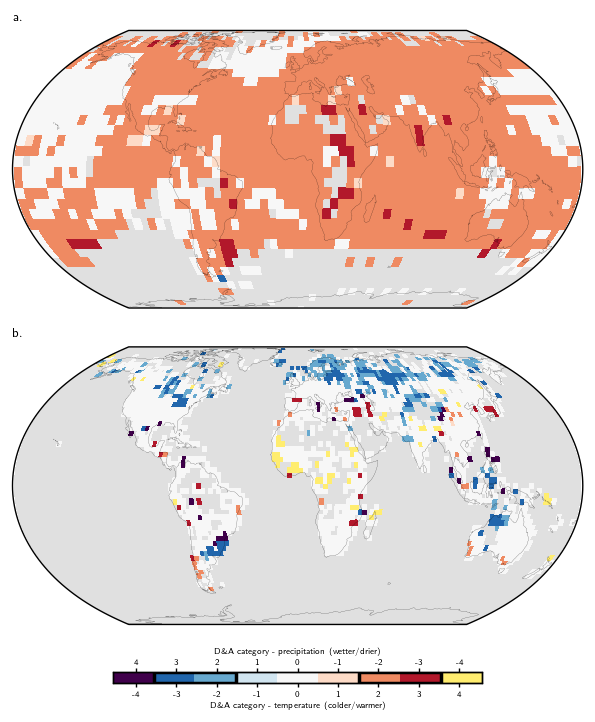

In [23]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,7), dpi=125, constrained_layout=False)


w_r = [0.5,1.3,0.5]
h_r = [1,1,0.1]#,0.1] * 2 + [1.7,0.3,0.3,.1]
gs = fig.add_gridspec(3, 3, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1,)


############################################################
## Plot Temperature

colors = ['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]


axa = plt.subplot(gs[0,:3], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp',colors)

############################################################
## Plot Precipitation

colors = ['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"]

axb = plt.subplot(gs[1,:3], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip',colors)

# Cbar
cax = plt.subplot(gs[2,1])
    
double_cbar(mesh, cax, 0.4)

#plt.savefig('../figures/figure_2bc.pdf')
#plt.savefig('../figures/figure_2bc.png')

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,knutson_temp,updated_temp,...,temp_da_cat,temp_da_binary,precip_da_binary,n_da_impacts,max_da_cat,study_addition,total_study_prop,area,is_land,evidence_cat
0,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.000000,1685.654015,False,4.0
1,-88.75,-176.25,-88.75,-176.25,-87.5,-177.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.000000,1685.654015,False,4.0
2,-88.75,-173.75,-88.75,-173.75,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.000000,1685.654015,False,4.0
3,-88.75,-171.25,-88.75,-171.25,-87.5,-172.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.000000,1685.654015,False,4.0
4,-88.75,-168.75,-88.75,-168.75,-87.5,-167.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.000000,1685.654015,False,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10364,88.75,171.25,88.75,171.25,87.5,172.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.327727,1685.654015,False,4.0
10365,88.75,173.75,88.75,173.75,87.5,172.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.327727,1685.654015,False,4.0
10366,88.75,176.25,88.75,176.25,87.5,177.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.327727,1685.654015,False,4.0
10367,88.75,178.75,88.75,178.75,87.5,177.5,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0.0,add,0.327727,1685.654015,False,4.0


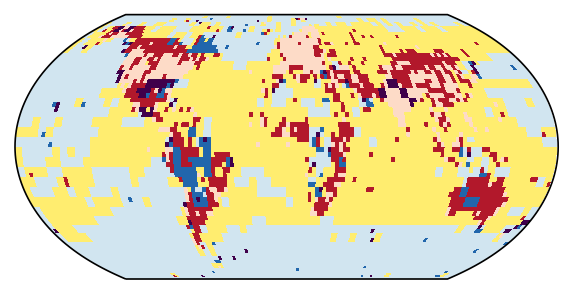

In [24]:
############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)

degrees=2.5

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())

lmin = df[df['LON']==df['LON'].min()]
lmin['LON'] = df['LON'].max()+degrees*0.5

df = pd.concat([df,lmin]).sort_values(['LAT','LON'])

n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))   
cmap = mpl.colors.ListedColormap(colors)

mesh = axc.pcolormesh(
    df.LON.unique()-degrees*0.5,
    df.LAT.unique()-degrees*0.5,
    n,
    cmap = cmap,
    transform=ccrs.PlateCarree(),
)

df

/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


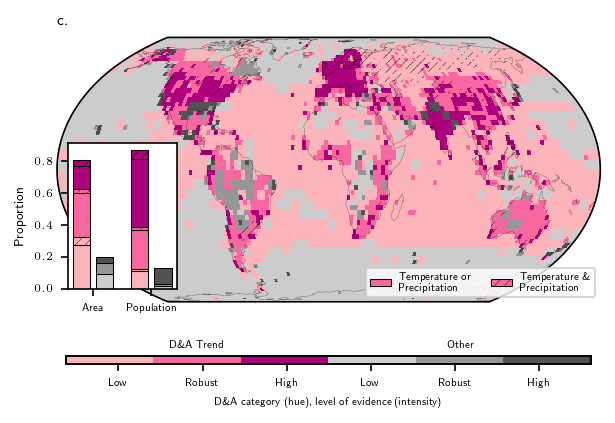

In [25]:
## Summary figure

mpl.rcParams['hatch.linewidth'] = 0.2

title_fs = 7

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)

############################################################
## Plot summary fig

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())

axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )

greys = ['#f7f7f7','#cccccc','#969696','#525252'][1:]
reds = ['#fee5d9','#fcae91','#fb6a4a','#cb181d'][1:]
purples = ['#f2f0f7','#cbc9e2','#9e9ac8','#6a51a3'][1:]
rdpu = ['#feebe2','#fbb4b9','#f768a1','#ae017e'][1:]
impact_cols = rdpu
colors = impact_cols + greys 

def sum_figure(ax, df, colors, degrees=2.5):
    
    lmin = df[df['LON']==df['LON'].min()]
    lmin['LON'] = df['LON'].max()+degrees*0.5
    df = pd.concat([df,lmin]).sort_values(['LAT','LON'])

    ax.coastlines(lw=0.1)
    n = np.array(df.evidence_cat).reshape(len(df.LAT.unique()),len(df.LON.unique()))   
    cmap = mpl.colors.ListedColormap(colors)

    mesh = ax.pcolormesh(
        df.LON.unique()-degrees*0.5,
        df.LAT.unique()-degrees*0.5,
        n,
        cmap = cmap,
        transform=ccrs.PlateCarree(),
    )

    n = np.array(df.n_da_impacts).reshape(len(df.LAT.unique()),len(df.LON.unique()))
    zm = np.ma.masked_less(n, 2)
    with mpl.rc_context(rc={'hatch.linewidth': .5}):

        dots = axc.pcolor(
            df.LON.unique(),
            df.LAT.unique(),
            zm, hatch="//////",
            transform=ccrs.PlateCarree(),
            alpha=0.
        )
    
    return mesh

mesh = sum_figure(axc, df, colors)

def inset_figure(ax, df, colors):
    
    area_sums = df[df['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
    area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

    pop_sums = df.groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
    pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
    bottoms = {0: 0.0, 1: 0.0}
    
    handles = []

    hatch_types = ["","","/////"]

    offsets = [0.1,-0.1]

    with mpl.rc_context(rc={'hatch.linewidth': 2}):

        for i, (name, group) in enumerate(area_sums.groupby('evidence_cat')):
            x = name//4
            for j, group in group.groupby('n_da_impacts'):
                y = group['prop'].values[0]
                bar = axins.bar(
                    x+offsets[int(x)],y, bottom=bottoms[x], 
                    color=colors[i], hatch=hatch_types[j],
                    edgecolor="black",
                    linewidth=0.5,
                    width=0.6
                )
                bottoms[x]+=y
                if i == 1:
                    handles.append(bar)

        bottoms = {0: 0.0, 1: 0.0}

        for i, (name, group) in enumerate(pop_sums.groupby('evidence_cat')):
            x = name//4
            for j, group in group.groupby('n_da_impacts'):
                y = group['prop'].values[0]
                axins.bar(
                    x+2+offsets[int(x)],y, bottom=bottoms[x], 
                    color=colors[i], hatch=hatch_types[j],
                    edgecolor="black",
                    linewidth=0.5,
                    width=0.6
                )
                bottoms[x]+=y

    axins.set_xticks([0.5,2.5])

    da_labels = ["D\&A Trend", "Other"]
    axins.set_xticklabels(["Area","Population"], fontsize=5)

    axins.tick_params(axis="y",labelsize=5)

    axins.set_ylabel("Proportion",fontsize=6)
    
    return handles
    
axins = axc.inset_axes([0.02,0.05,0.2,0.55])

handles = inset_figure(axins, df, colors)

axc.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)


## Colorbar
cax = plt.subplot(gs[3,1:3])

def rg_cbar(cax, mesh, frac):
    cax.axis('off')
    cax = cax.inset_axes([0.0,(1-frac)*0.5-frac*0.25,1,frac])
    cax2 = cax.twiny()
    cax2.set_xlim(0,6)
    cax2.set_xticks([1.5,4.5])
    cax2.set_xticklabels(["D\&A Trend","Other"],fontsize=5)
    cax2.xaxis.set_tick_params(pad=3,length=0)

    cbar = plt.colorbar(
        mesh, orientation="horizontal", cax=cax, 
    )
    cbar.set_ticks(np.array(np.linspace(1.5,5.5,6)))

    cbar.set_ticklabels([
        fr"Low",
        fr"Robust",
        fr"High"
    ]*2)
    cbar.set_label('D\&A category (hue), level of evidence (intensity)', fontsize=5, labelpad=4.5)
    cbar.ax.tick_params(labelsize=5)
    
rg_cbar(cax,mesh,0.8)
#ax.axis('off')
plt.savefig("../figures/figure_2c.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_2c.png", dpi=300, bbox_inches="tight")
#plt.savefig("../figures/figure_2.svg", bbox_inches="tight")

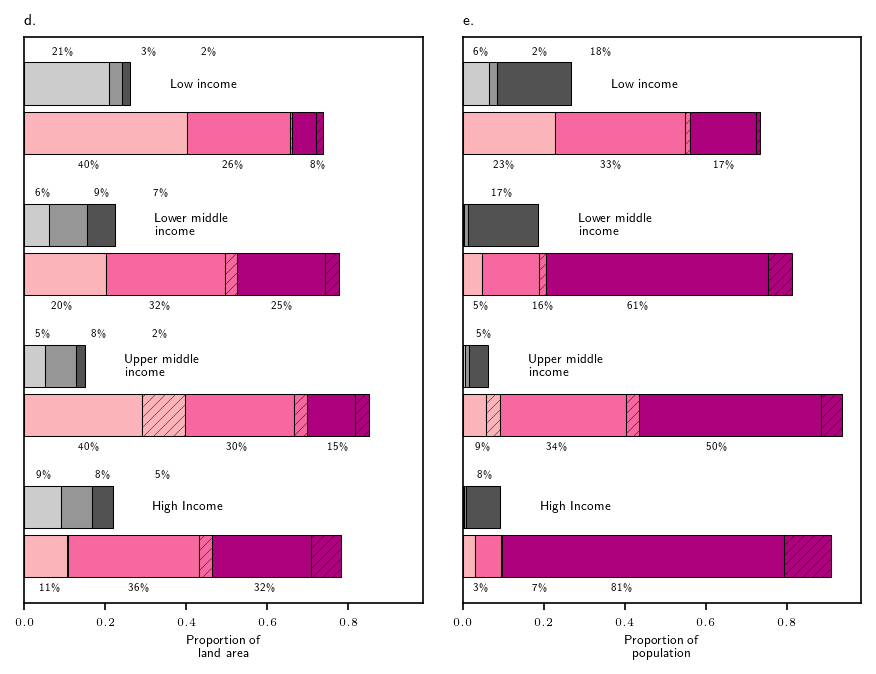

In [26]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,1,1]

h_r = [1.25,0.1,2.6,0.1]

gs = fig.add_gridspec(1, 2, figure=fig, wspace=0.1, hspace=0.5)

###########################################################
##

labels = ["Proportion of\nland area","Proportion of\npopulation"]
texts = []

axs = [plt.subplot(gs[:,0])]

axs.append(plt.subplot(gs[:,1],sharex=axs[0]))

offsets = [0.15,-0.15]

for k in [0,1]:
    income_x = 0
    ax = axs[k]
    ax.set_title(f'{chr(k+100)}.', fontsize=title_fs, fontweight="bold", loc="left" )
    ax.set_xlabel(labels[k], fontsize=6)

    handles = [[],[]]
    
    for inc, group in shp_ndf_df.groupby('Income category'):
        cells = df[df['index'].isin(group['ndf_id'])]

        area_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
        area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

        pop_sums = cells.groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
        pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
        
        sums = [area_sums, pop_sums][k]

        bottoms = {0: 0.0, 1: 0.0}
        


        with mpl.rc_context(rc={'hatch.linewidth': 2}):
            
            ys = []
            text_labels = []
            min_text_left = 0.025

            for i, (name, group) in enumerate(sums.groupby('evidence_cat')):
                x = name//4 
                if bottoms[x]==0:
                    ys = []
                y = bottoms[x]+group['prop'].sum()*0.33
                if group['prop'].sum()>0.02:
                    ys.append(max(y,min_text_left))
                    if len(ys)>1:
                        min_distance = ys[-1] - ys[-2]
                        
                        while min_distance < 0.07*len(text_labels[-1]):
                            y+=0.01
                            ys[-1] = y
                            min_distance = ys[-1] - ys[-2]
                    texts.append(ax.text(
                        max(y,min_text_left),x + income_x + offsets[int(x)]*-2, 
                        f"{group['prop'].sum():.0%}".replace("%","\%"),
                        ha="left",va="center", fontsize=5
                    ))
                    text_labels.append(f"{group['prop'].sum():.0%}")
                for j, group in group.groupby('n_da_impacts'):
                    y = group['prop'].values[0]
                    b = ax.barh(
                        x + income_x + offsets[int(x)],y, left=bottoms[x], 
                        color=colors[i], hatch=hatch_types[j],
                        edgecolor="black",
                        linewidth=0.5,
                        height=0.6
                    )
                    bottoms[x]+=y
                    if "Upper" in inc:
                        #print(int(x))
                        #print(colors[i])
                        handles[int(x)] = handles[int(x)] + [b]
                        #print([bp.patches[0].get_fc() for bp in handles[0]])
                
        ax.text(bottoms[x]+0.1, x + income_x + offsets[int(x)],inc[3:].replace('middle',"middle\n"),ha="left", va="center", fontsize=6)
        income_x+=2
        
    ax.tick_params(axis='x', labelsize=5)
        
axs[1].set_yticks([])
        
axs[0].set_yticks([])

plt.savefig("../figures/figure_2de.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_2de.png", dpi=300, bbox_inches="tight")

(-4.0, 4.0)


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[]

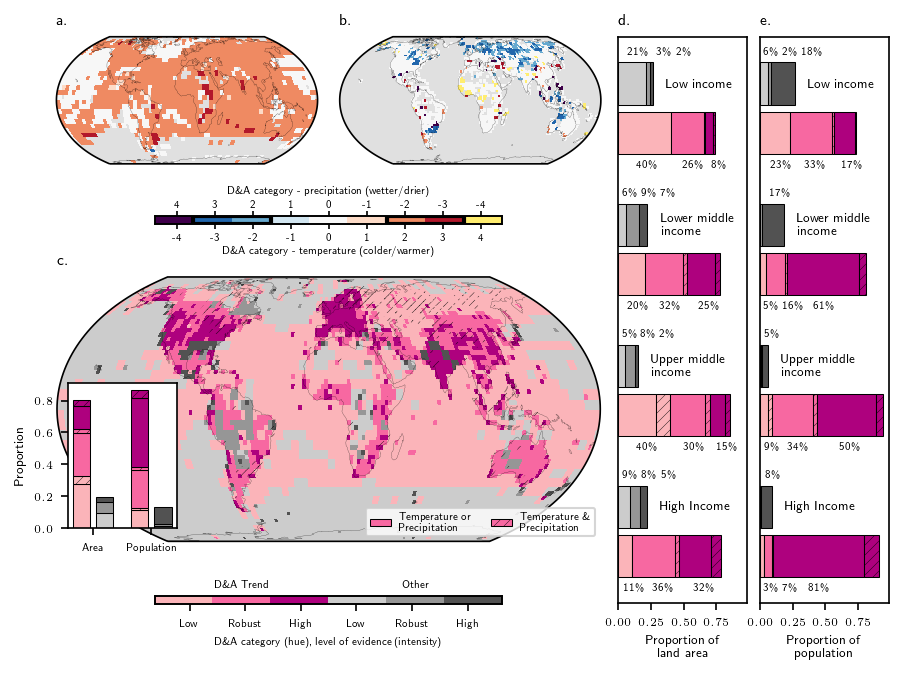

In [27]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,1,1]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

## Cbar
cax = plt.subplot(gs[1,1:3])

double_cbar(mesh, cax, 0.8)

############################################################
## Plot summary fig

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())
axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = sum_figure(axc, df, colors)

axins = axc.inset_axes([0.02,0.05,0.2,0.55])
handles = inset_figure(axins, df, colors)

axc.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)

## Colorbar
cax = plt.subplot(gs[3,1:3])    
rg_cbar(cax,mesh,0.8)


###########################################################
##

labels = ["Proportion of\nland area","Proportion of\npopulation"]
texts = []

axs = [plt.subplot(gs[:10,4])]

axs.append(plt.subplot(gs[:10,5],sharex=axs[0]))

offsets = [0.15,-0.15]

for k in [0,1]:
    income_x = 0
    ax = axs[k]
    ax.set_title(f'{chr(k+100)}.', fontsize=title_fs, fontweight="bold", loc="left" )
    ax.set_xlabel(labels[k], fontsize=6)

    handles = [[],[]]
    
    for inc, group in shp_ndf_df.groupby('Income category'):
        cells = df[df['index'].isin(group['ndf_id'])]

        area_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
        area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

        pop_sums = cells.groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
        pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
        
        sums = [area_sums, pop_sums][k]

        bottoms = {0: 0.0, 1: 0.0}
        


        with mpl.rc_context(rc={'hatch.linewidth': 2}):
            
            ys = []
            text_labels = []
            min_text_left = 0.025

            for i, (name, group) in enumerate(sums.groupby('evidence_cat')):
                x = name//4 
                if bottoms[x]==0:
                    ys = []
                y = bottoms[x]+group['prop'].sum()*0.33
                if group['prop'].sum()>0.02:
                    ys.append(max(y,min_text_left))
                    if len(ys)>1:
                        min_distance = ys[-1] - ys[-2]
                        
                        while min_distance < 0.07*len(text_labels[-1]):
                            y+=0.01
                            ys[-1] = y
                            min_distance = ys[-1] - ys[-2]
                    texts.append(ax.text(
                        max(y,min_text_left),x + income_x + offsets[int(x)]*-2, 
                        f"{group['prop'].sum():.0%}".replace("%","\%"),
                        ha="left",va="center", fontsize=5
                    ))
                    text_labels.append(f"{group['prop'].sum():.0%}")
                for j, group in group.groupby('n_da_impacts'):
                    y = group['prop'].values[0]
                    b = ax.barh(
                        x + income_x + offsets[int(x)],y, left=bottoms[x], 
                        color=colors[i], hatch=hatch_types[j],
                        edgecolor="black",
                        linewidth=0.5,
                        height=0.6
                    )
                    bottoms[x]+=y
                    if "Upper" in inc:
                        #print(int(x))
                        #print(colors[i])
                        handles[int(x)] = handles[int(x)] + [b]
                        #print([bp.patches[0].get_fc() for bp in handles[0]])
                
        ax.text(bottoms[x]+0.1, x + income_x + offsets[int(x)],inc[3:].replace('middle',"middle\n"),ha="left", va="center", fontsize=6)
        income_x+=2
        
    ax.tick_params(axis='x', labelsize=5)
        
axs[1].set_yticks([])
        
axs[0].set_yticks([])

# plt.savefig("../figures/figure_2.pdf", bbox_inches="tight")
# plt.savefig("../figures/figure_2.png", dpi=300, bbox_inches="tight")
# plt.savefig("../figures/figure_2.svg", bbox_inches="tight")


(-4.0, 4.0)


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


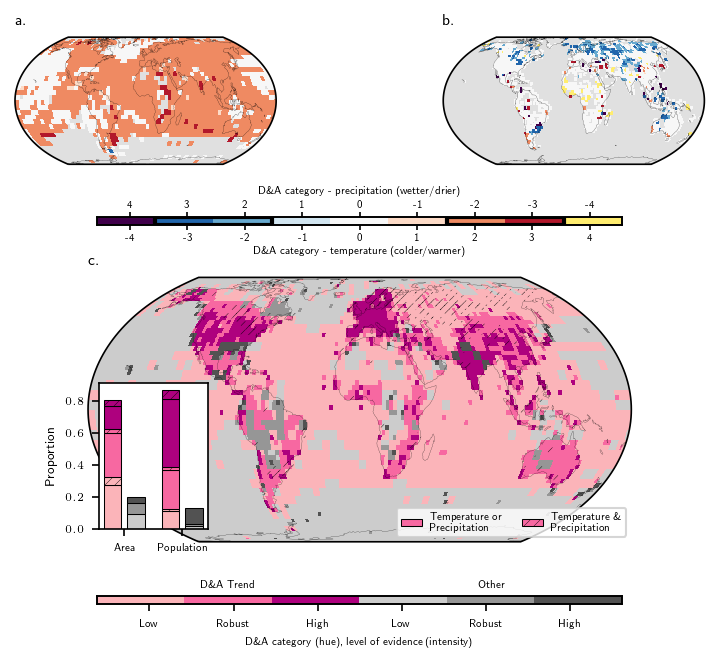

In [28]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

## Cbar
cax = plt.subplot(gs[1,1:3])

double_cbar(mesh, cax, 0.8)

############################################################
## Plot summary fig

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())
axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = sum_figure(axc, df, colors)

axins = axc.inset_axes([0.02,0.05,0.2,0.55])
handles = inset_figure(axins, df, colors)

axc.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)

## Colorbar
cax = plt.subplot(gs[3,1:3])    
rg_cbar(cax,mesh,0.8)


###########################################################
##

# plt.savefig("../figures/figure_2.pdf", bbox_inches="tight")
# plt.savefig("../figures/figure_2.png", dpi=300, bbox_inches="tight")
# plt.savefig("../figures/figure_2.svg", bbox_inches="tight")


(-4.0, 4.0)


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


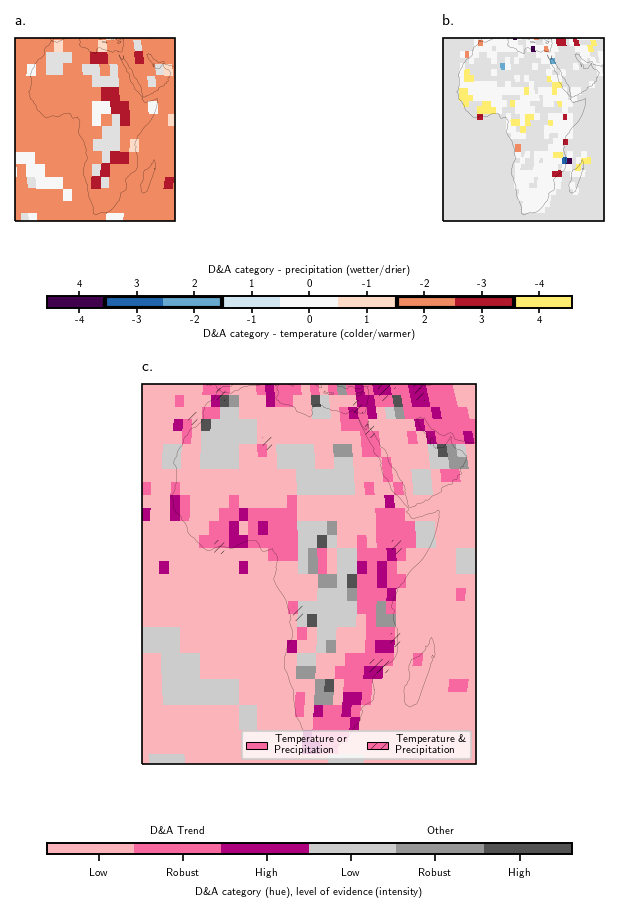

In [29]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,7.2), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_extent([-25,60,-30,30])
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_extent([-25,60,-30,30])
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

## Cbar
cax = plt.subplot(gs[1,1:3])

double_cbar(mesh, cax, 0.8)

############################################################
## Plot summary fig

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())
axc.set_extent([-25,60,-30,30])
axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = sum_figure(axc, df, colors)

#axins = axc.inset_axes([0.02,0.05,0.2,0.55])
#handles = inset_figure(axins, df, colors)

axc.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)

## Colorbar
cax = plt.subplot(gs[3,1:3])    
rg_cbar(cax,mesh,0.8)


###########################################################
##

# plt.savefig("../figures/figure_2.pdf", bbox_inches="tight")
# plt.savefig("../figures/figure_2.png", dpi=300, bbox_inches="tight")
# plt.savefig("../figures/figure_2.svg", bbox_inches="tight")


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


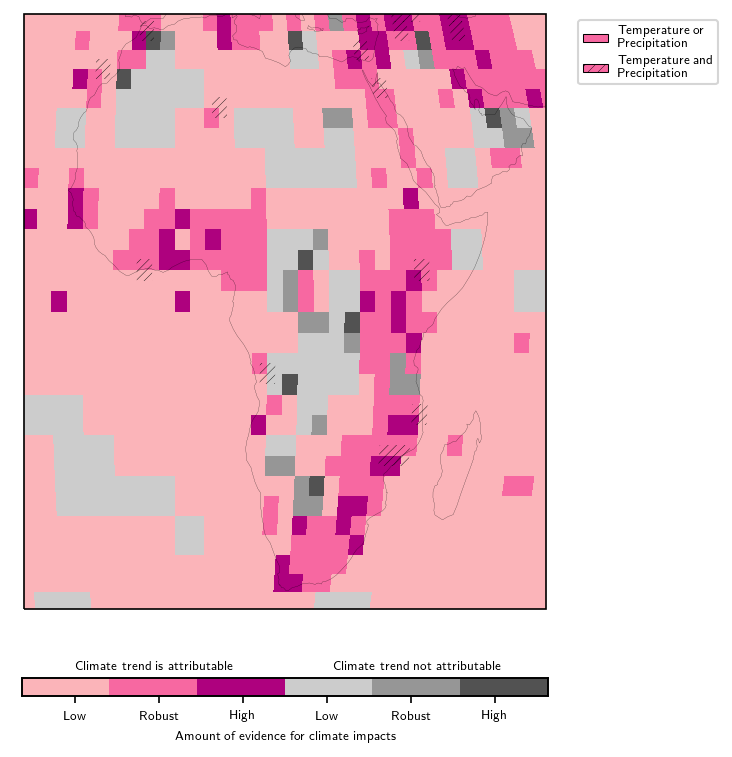

In [31]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,6), dpi=150, constrained_layout=False)

w_r = [0.7,1.3,1.3,0.7]

h_r = [2.6,0.1]

gs = fig.add_gridspec(2, 4, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1)


############################################################
## Plot summary fig

axc = plt.subplot(gs[0,0:4], projection=ccrs.EqualEarth())
axc.set_extent([-25,60,-30,30])
#axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = sum_figure(axc, df, colors)

#axins = axc.inset_axes([0.02,0.05,0.2,0.55])
#handles = inset_figure(axins, df, colors)

axc.legend(
    handles, ["Temperature or\nPrecipitation","Temperature and\n Precipitation"],fontsize=6, 
    ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left'
)

## Colorbar
cax = plt.subplot(gs[1,1:3]) 

frac=0.8

cax.axis('off')
cax = cax.inset_axes([0.0,(1-frac)*0.5-frac*0.25,1,frac])
cax2 = cax.twiny()
cax2.set_xlim(0,6)
cax2.set_xticks([1.5,4.5])
cax2.set_xticklabels(["Climate trend is attributable","Climate trend not attributable"],fontsize=6)
cax2.xaxis.set_tick_params(pad=3,length=0)

cbar = plt.colorbar(
    mesh, orientation="horizontal", cax=cax, 
)
cbar.set_ticks(np.array(np.linspace(1.5,5.5,6)))

cbar.set_ticklabels([
    fr"Low",
    fr"Robust",
    fr"High"
]*2)
cbar.set_label('Amount of evidence for climate impacts', fontsize=6, labelpad=4.5)
cbar.ax.tick_params(labelsize=6)



###########################################################
##

plt.savefig("../figures/figure_2_africa.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_2_africa.png", dpi=300, bbox_inches="tight")
plt.savefig("../figures/figure_2_africa.svg", bbox_inches="tight")


(-4.0, 4.0)


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


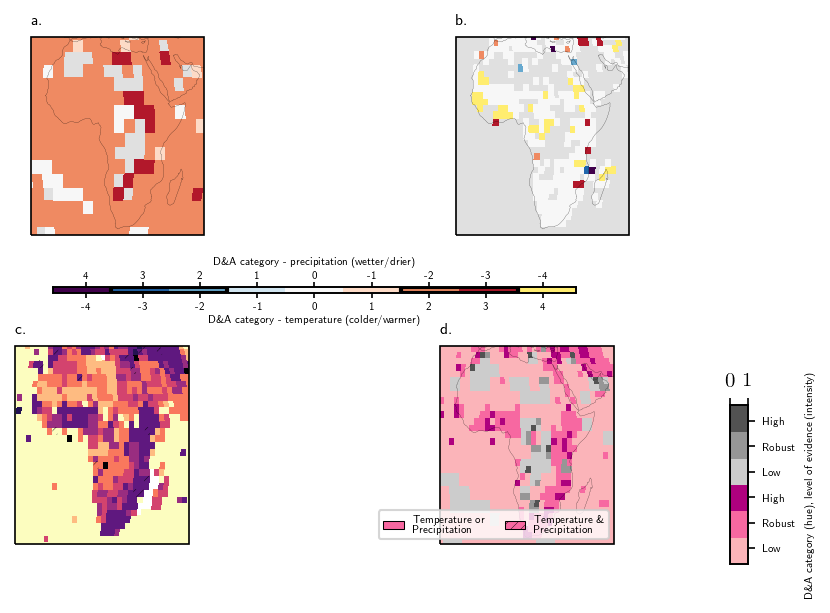

In [72]:
import itertools
from matplotlib.patches import Rectangle, Patch

title_fs = 7

## Different arrangement

############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,0.1,1.3,0.7,0.1]

h_r = [2.6,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:3], projection=ccrs.EqualEarth())
axa.set_extent([-25,60,-30,30])
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,3:6], projection=ccrs.EqualEarth())
axb.set_extent([-25,60,-30,30])
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

## Cbar
cax = plt.subplot(gs[1,1:4])

double_cbar(mesh, cax, 0.8)

############################################################
## N studies


axc = plt.subplot(gs[2,0:2], projection=ccrs.EqualEarth())
axc.set_extent([-25,60,-30,30])
axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )


n = np.array(df.total_study_prop).reshape(len(df.LAT.unique()),len(df.LON.unique()))
#vm = round(n.max()/10*10)
vm = n.max()
n[n==0] = np.nan

bounds = np.array([0,0.5,1,2.5,5,10,50,100,vm])


mesh = axc.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
   #norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
    norm = mpl.colors.BoundaryNorm(bounds,256),
    #cmap=plt.cm.get_cmap('YlOrBr',vm/3-1), 
    #cmap = "YlOrBr",
    cmap = "magma_r",
    transform=ccrs.PlateCarree(),
    #alpha=0.5
)
#cbar = plt.colorbar(mesh)
#mesh = sum_figure(axc, df, colors)

#axc.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)


############################################################
## Plot summary fig

axd = plt.subplot(gs[2,3:5], projection=ccrs.EqualEarth())
axd.set_extent([-25,60,-30,30])
axd.set_title('d.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = sum_figure(axd, df, colors)

axd.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)


## Colorbar
cax = plt.subplot(gs[2,5])   

frac=0.8

cax.axis('off')
cax = cax.inset_axes([0.0,(1-frac)*0.5-frac*0.25,1,frac])
cax2 = cax.twiny()
cax2.set_ylim(0,6)
cax2.set_yticks([1.5,4.5])
cax2.set_yticklabels(["D\&A Trend","Other"],fontsize=5)
cax2.yaxis.set_tick_params(pad=3,length=0)

cbar = plt.colorbar(
    mesh, orientation="vertical", cax=cax, 
)
cbar.set_ticks(np.array(np.linspace(1.5,5.5,6)))

cbar.set_ticklabels([
    fr"Low",
    fr"Robust",
    fr"High"
]*2)
cbar.set_label('D\&A category (hue), level of evidence (intensity)', fontsize=5, labelpad=4.5)
cbar.ax.tick_params(labelsize=5)


###########################################################
##

# plt.savefig("../figures/figure_2.pdf", bbox_inches="tight")
# plt.savefig("../figures/figure_2.png", dpi=300, bbox_inches="tight")
# plt.savefig("../figures/figure_2.svg", bbox_inches="tight")


(-4.0, 4.0)


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


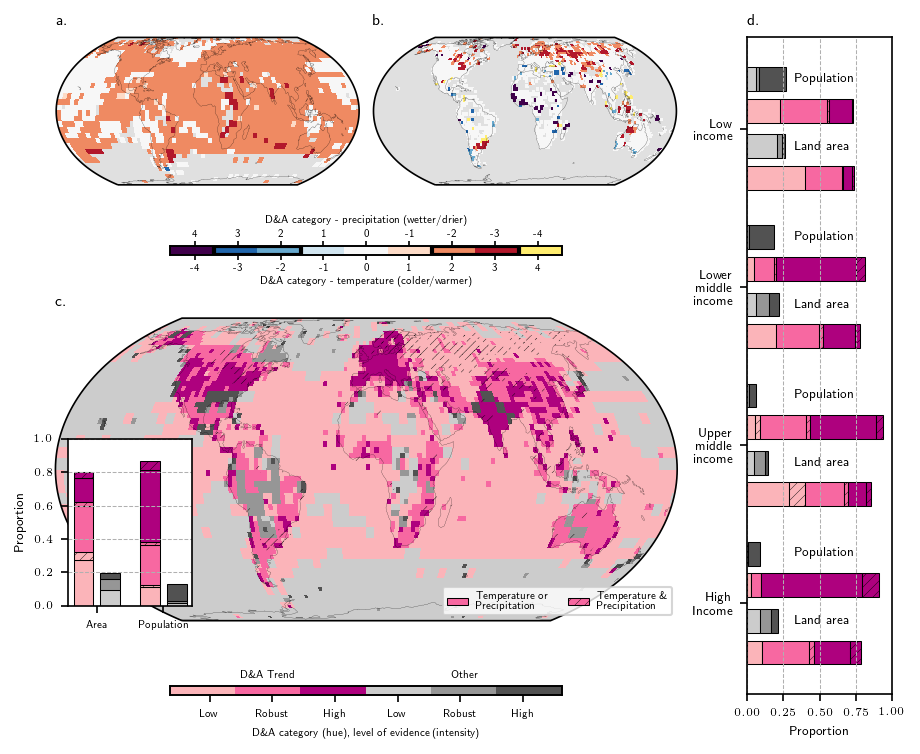

In [46]:
############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5.8), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,0.3,1]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip',['#ffed6f','#b2182b','#ef8a62','#fddbc7','#f7f7f7','#d1e5f0','#67a9cf','#2166ac',"#40004b"])

## Cbar
cax = plt.subplot(gs[1,1:3])

double_cbar(mesh, cax, 0.8)

############################################################
## Plot summary fig

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())
axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = sum_figure(axc, df, colors)

axins = axc.inset_axes([0.02,0.05,0.2,0.55])
axins.grid(axis='y',linestyle='--',lw=0.5,zorder=-1)
axins.set_ylim(0,1)
handles = inset_figure(axins, df, colors)

axc.legend(handles, ["Temperature or\nPrecipitation","Temperature \&\n Precipitation"],fontsize=5, loc="lower right", ncol=2)

## Colorbar
cax = plt.subplot(gs[3,1:3])    
rg_cbar(cax,mesh,0.8)

###################################################
##

short_labels = ['Land area',"Population"]
ax = plt.subplot(gs[:10,5:])

ax.grid(axis='x',linestyle='--',lw=0.5,zorder=-1)
ax.set_xlim(0,1)

ax.set_title('d.', fontsize=title_fs, fontweight="bold", loc="left" )
ax.set_xlabel("Proportion", fontsize=6)

offsets = [0.1,-0.1]
k_offsets = [0.15,-0.15]

for k in [0,1]:
    income_x = 0

    
    for inc, group in shp_ndf_df.groupby('Income category'):
        cells = df[df['index'].isin(group['ndf_id'])]

        area_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
        area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

        pop_sums = cells.groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
        pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
        
        sums = [area_sums, pop_sums][k]

        bottoms = {0: 0.0, 1: 0.0}
        
        with mpl.rc_context(rc={'hatch.linewidth': 2}):
            for i, (name, group) in enumerate(sums.groupby('evidence_cat')):
                x = name//4 
                for j, group in group.groupby('n_da_impacts'):
                    y = group['prop'].values[0]
                    b = ax.barh(
                        x + income_x*2 + k*2 + offsets[int(x)] + k_offsets[k],y, left=bottoms[x], 
                        color=colors[i], hatch=hatch_types[j],
                        edgecolor="black",
                        linewidth=0.5,
                        height=0.6
                    )
                    bottoms[x]+=y
            
        ax.text(0.33, x + income_x*2 + k*2 + offsets[int(x)] + k_offsets[k],short_labels[k].replace('middle',"middle\n"),ha="left", va="center", fontsize=6)
        income_x+=2
        
ax.tick_params(axis='x', labelsize=5)
ax.set_yticks([1.5,5.5,9.5,13.5])
inc_labels = [x[3:].replace(' ',"\n") for x in shp_ndf_df['Income category'].unique()]
inc_labels.reverse()
ax.set_yticklabels(inc_labels, fontsize=6)



plt.savefig("../figures/figure_2.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_2.png", dpi=300, bbox_inches="tight")
plt.savefig("../figures/figure_2.svg", bbox_inches="tight")


(-4.0, 4.0)


/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


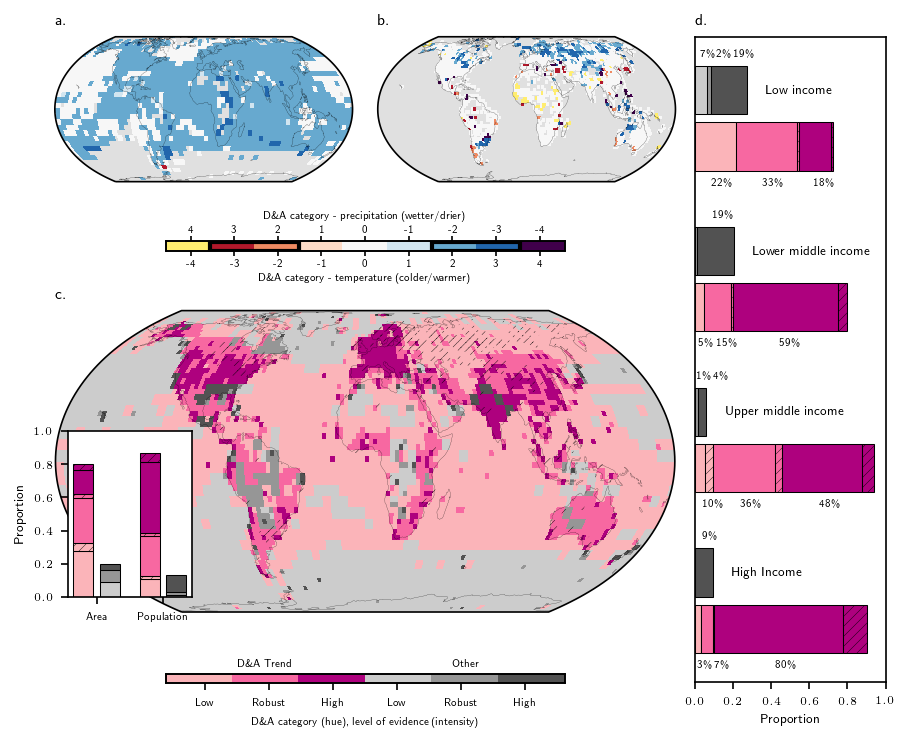

In [31]:
############################################################
## Set up figure
fig = plt.figure(figsize=(7.2,5.7), dpi=150, constrained_layout=False)
w_r = [0.7,1.3,1.3,0.7,0.6,0.6]

h_r = [1.25,0.1,2.6,0.1]
gs = fig.add_gridspec(4, 6, width_ratios=w_r, height_ratios=h_r, figure=fig, wspace=0.1, hspace=0.5)


############################################################
## Plot Temperature

axa = plt.subplot(gs[0,0:2], projection=ccrs.EqualEarth())
axa.set_title('a.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = plot_da(df, axa, 'updated_temp')

############################################################
## Plot Precipitation

axb = plt.subplot(gs[0,2:4], projection=ccrs.EqualEarth())
axb.set_title('b.', fontsize=title_fs, fontweight="bold", loc="left" )
plot_da(df, axb, 'updated_precip')

## Cbar
cax = plt.subplot(gs[1,1:3])
double_cbar(mesh, cax, 0.8)

############################################################
## Plot summary fig

axc = plt.subplot(gs[2,0:4], projection=ccrs.EqualEarth())
axc.set_title('c.', fontsize=title_fs, fontweight="bold", loc="left" )
mesh = sum_figure(axc, df, colors)

axins = axc.inset_axes([0.02,0.05,0.2,0.55])
axins.set_ylim(0,1)
inset_figure(axins, df, colors)

## Colorbar
cax = plt.subplot(gs[3,1:3])    
rg_cbar(cax,mesh,0.8)

##########################################
## Sums

offsets = [0.15,-0.15]

labels = ["Proportion of\nland area","Proportion of\npopulation"]

axs = [plt.subplot(gs[:,4:])]

for k in [1]:
    income_x = 0
    ax = plt.subplot(gs[:11,4:])
    ax.set_xlim(0,1)
    ax.set_xlabel("Proportion", fontsize=6)
    
    ax.set_title("d.", fontsize=title_fs, fontweight="bold", loc="left" )

    handles = [[],[]]
    
    for inc, group in shp_ndf_df.groupby('Income category'):
        cells = df[df['index'].isin(group['ndf_id'])]

        area_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['area'].sum().reset_index()
        area_sums['prop'] = area_sums['area']/area_sums['area'].sum()

        pop_sums = cells[cells['is_land']==True].groupby(['evidence_cat','n_da_impacts'])['population'].sum().reset_index()
        pop_sums['prop'] = pop_sums['population']/pop_sums['population'].sum()
        
        sums = [area_sums, pop_sums][k]

        bottoms = {0: 0.0, 1: 0.0}

        with mpl.rc_context(rc={'hatch.linewidth': 2}):
            
            ys = []

            for i, (name, group) in enumerate(sums.groupby('evidence_cat')):
                x = name//4 
                if bottoms[x]==0:
                    ys = []
                y = bottoms[x]+group['prop'].sum()*0.4
                if y>0.007:
                    ys.append(max(y,0.01))
                    if len(ys)>1:
                        min_distance = np.min([abs(x[0]-x[1]) for x in itertools.combinations(ys,2)])
                        while min_distance < 0.08:
                            y+=0.01
                            ys[-1] = y
                            min_distance = np.min([abs(x[0]-x[1]) for x in itertools.combinations(ys,2)])
                    texts.append(ax.text(
                        max(y,0.01),x + income_x + offsets[int(x)]*-2, 
                        f"{group['prop'].sum():.0%}".replace("%","\%"),
                        ha="left",va="center", fontsize=5
                    ))
                for j, group in group.groupby('n_da_impacts'):
                    y = group['prop'].values[0]
                    b = ax.barh(
                        x + income_x + offsets[int(x)],y, left=bottoms[x], 
                        color=colors[i], hatch=hatch_types[j],
                        edgecolor="black",
                        linewidth=0.5,
                        height=0.6
                    )
                    bottoms[x]+=y
                    if "Upper" in inc:
                        #print(int(x))
                        #print(colors[i])
                        handles[int(x)] = handles[int(x)] + [b]
                        #print([bp.patches[0].get_fc() for bp in handles[0]])
                        
                        
        ax.text(bottoms[x]+0.1, x + income_x + offsets[int(x)],inc[3:],ha="left", va="center", fontsize=6)

        income_x+=2
        
    ax.tick_params(axis='x', labelsize=5)
        
        
axs[0].set_yticks([])

plt.savefig("../figures/figure_2_single.pdf", bbox_inches="tight")
plt.savefig("../figures/figure_2_single.png", dpi=300, bbox_inches="tight")
plt.savefig("../figures/figure_2_single.svg", bbox_inches="tight")

In [32]:
doc_continents = pd.read_csv('../data/doc_continents.csv').merge(pd.read_csv('../data/1_document_relevance.csv'), left_on="doc_id",right_on="id")
doc_continents.head()

,doc_id,continent,id,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred
0,1340101,NaN,1340101,0.971459,0.011893,0.959566,0.983352
1,222401,North America,222401,0.863356,0.094123,0.769234,0.957479
2,3307272,North America,3307272,0.417414,0.326589,0.090824,0.744003
3,355004,North America,355004,0.979262,0.007200,0.972063,0.986462
4,4603,North America,4603,0.977561,0.004507,0.973055,0.982068


In [33]:
driver_preds = pd.read_csv('../data/1_driver_predictions.csv')
driver_preds.head()

,id,6 - Temperature - mean_prediction,6 - Temperature - std_prediction,6 - Temperature - lower_pred,6 - Temperature - upper_pred,6 - Precipitation - mean_prediction,6 - Precipitation - std_prediction,6 - Precipitation - lower_pred,6 - Precipitation - upper_pred,6 - Other - mean_prediction,6 - Other - std_prediction,6 - Other - lower_pred,6 - Other - upper_pred
0,1300115,0.599319,0.123371,0.475948,0.722689,0.039122,0.007976,0.031147,0.047098,0.438100,0.142500,0.295600,0.580600
1,626619,0.163634,0.046660,0.116974,0.210294,0.244802,0.041110,0.203692,0.285913,0.634133,0.103451,0.530682,0.737583
2,3910065,0.276482,0.167964,0.108517,0.444446,0.765776,0.082619,0.683157,0.848395,0.224603,0.095029,0.129574,0.319631
3,2317601,0.613144,0.223667,0.389477,0.836811,0.183233,0.014026,0.169207,0.197258,0.300958,0.181628,0.119329,0.482586
4,618304,0.867647,0.054082,0.813565,0.921728,0.036531,0.008577,0.027954,0.045109,0.137281,0.047012,0.090269,0.184293


In [34]:
relevance_preds = pd.read_csv('../data/1_document_relevance.csv')
relevance_preds.head()

,id,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred
0,678698,0.057748,0.055826,0.001922,0.113574
1,3961889,0.014277,0.002146,0.012131,0.016422
2,739009,0.347678,0.326248,0.021430,0.673926
3,3171692,0.020444,0.003359,0.017084,0.023803
4,3820381,0.518891,0.341092,0.177799,0.859983


In [35]:
impact_preds = pd.read_csv('../data/1_impact_predictions.csv')
impact_preds.head()

,id,12 - Coastal and marine Ecosystems - mean_prediction,12 - Coastal and marine Ecosystems - std_prediction,12 - Coastal and marine Ecosystems - lower_pred,12 - Coastal and marine Ecosystems - upper_pred,12 - Human and managed - mean_prediction,12 - Human and managed - std_prediction,12 - Human and managed - lower_pred,12 - Human and managed - upper_pred,"12 - Mountains, snow and ice - mean_prediction",...,"12 - Rivers, lakes, and soil moisture - std_prediction","12 - Rivers, lakes, and soil moisture - lower_pred","12 - Rivers, lakes, and soil moisture - upper_pred",12 - Terrestrial ES - mean_prediction,12 - Terrestrial ES - std_prediction,12 - Terrestrial ES - lower_pred,12 - Terrestrial ES - upper_pred,12 - Other systems - mean_prediction,12 - Other systems - lower_pred,12 - Other systems - upper_pred
0,1304560,0.048914,0.006460,0.042455,0.055374,0.872455,0.039050,0.833404,0.911505,0.042727,...,0.005951,0.050738,0.062639,0.066794,0.014489,0.052305,0.081283,0.127545,0.088495,0.166596
1,1792178,0.036112,0.007379,0.028733,0.043491,0.874611,0.052186,0.822425,0.926797,0.043732,...,0.011291,0.057963,0.080545,0.088321,0.017989,0.070332,0.106310,0.125389,0.073203,0.177575
2,635990,0.858577,0.048666,0.809912,0.907243,0.045016,0.001041,0.043975,0.046056,0.026559,...,0.005298,0.015828,0.026424,0.062216,0.016962,0.045254,0.079178,0.141423,0.092757,0.190088
3,3955931,0.109802,0.031760,0.078042,0.141562,0.061773,0.016610,0.045163,0.078384,0.026318,...,0.005378,0.020039,0.030795,0.855639,0.042747,0.812893,0.898386,0.144361,0.101614,0.187107
4,1527392,0.057031,0.006157,0.050874,0.063187,0.895383,0.028736,0.866647,0.924119,0.049917,...,0.007083,0.050531,0.064697,0.077872,0.013339,0.064533,0.091211,0.104617,0.075881,0.133353


In [36]:
df_studies = pd.read_csv('../data/2_study_da.csv')
df_studies.head()

,id,temp_trend_cells,temp_da_prop,gridcells,temp_na_cells,temp_driver,6 - Temperature - upper_pred,6 - Temperature - mean_prediction,6 - Temperature - lower_pred,precip_trend_cells,precip_da_prop,precip_na_cells,precip_driver,6 - Precipitation - upper_pred,6 - Precipitation - mean_prediction,6 - Precipitation - lower_pred
0,48.0,1.0,1.000000,1.0,0.0,1.0,0.537484,0.428129,0.318774,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110.0,8.0,1.000000,8.0,0.0,1.0,0.928111,0.898859,0.869607,3.0,0.375,1.0,1.0,0.844943,0.697851,0.550758
2,160.0,2.0,1.000000,2.0,0.0,1.0,0.504505,0.374439,0.244373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,189.0,359.0,0.712302,504.0,0.0,1.0,0.891340,0.839745,0.788149,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,254.0,12.0,1.000000,12.0,0.0,1.0,0.921118,0.740390,0.559662,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_studies = pd.read_csv('../data/2_study_da.csv').merge(relevance_preds).merge(impact_preds)

df_studies.head()

,id,temp_trend_cells,temp_da_prop,gridcells,temp_na_cells,temp_driver,6 - Temperature - upper_pred,6 - Temperature - mean_prediction,6 - Temperature - lower_pred,precip_trend_cells,...,"12 - Rivers, lakes, and soil moisture - std_prediction","12 - Rivers, lakes, and soil moisture - lower_pred","12 - Rivers, lakes, and soil moisture - upper_pred",12 - Terrestrial ES - mean_prediction,12 - Terrestrial ES - std_prediction,12 - Terrestrial ES - lower_pred,12 - Terrestrial ES - upper_pred,12 - Other systems - mean_prediction,12 - Other systems - lower_pred,12 - Other systems - upper_pred
0,48.0,1.0,1.000000,1.0,0.0,1.0,0.537484,0.428129,0.318774,NaN,...,0.013255,0.049662,0.076173,0.035182,0.004170,0.031012,0.039351,0.936613,0.914342,0.950338
1,110.0,8.0,1.000000,8.0,0.0,1.0,0.928111,0.898859,0.869607,3.0,...,0.222285,0.000000,0.410867,0.286152,0.150955,0.135197,0.437106,0.713848,0.548659,0.864803
2,160.0,2.0,1.000000,2.0,0.0,1.0,0.504505,0.374439,0.244373,NaN,...,0.069339,0.142444,0.281122,0.055904,0.017051,0.038854,0.072955,0.137463,0.082981,0.191945
3,189.0,359.0,0.712302,504.0,0.0,1.0,0.891340,0.839745,0.788149,NaN,...,0.041469,0.069807,0.152744,0.017216,0.004263,0.012953,0.021479,0.826480,0.749844,0.903115
4,254.0,12.0,1.000000,12.0,0.0,1.0,0.921118,0.740390,0.559662,NaN,...,0.105054,0.000000,0.201714,0.486742,0.228846,0.257897,0.715588,0.513258,0.284412,0.742103


In [38]:
df_studies[df_studies.id.isin(relevance_preds.id)].shape

(98781, 43)

South America
North America
Africa
Europe
Asia
Oceania


(0.0, 1.0, 0.0, 1.0)

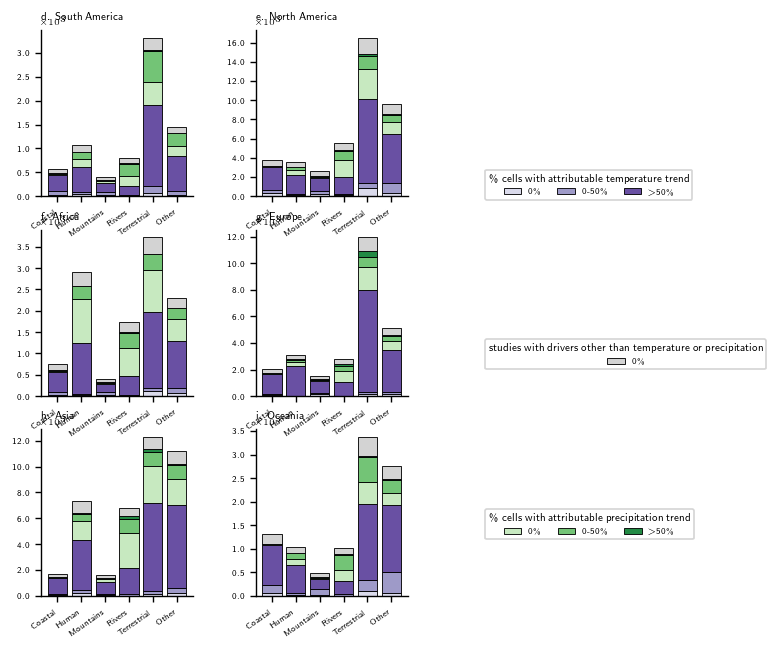

In [39]:

class OOMFormatter(mpl.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        mpl.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin=None, vmax=None):
        self.format = self.fformat
        #if self._useMathText:
            #self.format = r'$\mathdefault{%s}$' % self.format

def plot_continent_docs(continent, doc_continents, df_studies, sector_cols, ax, angle=35):
    colors = ["Purples","Greens"]
    group = doc_continents[doc_continents["continent"]==continent]
    print(continent)    
    ax.set_facecolor("none")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    vdf = df_studies[df_studies["id"].isin(group["doc_id"])]
    lw=0.5
    
    
    
    for i, col in enumerate(sector_cols):

        b = 0
        all_handles = []
        for j, da_var in enumerate([("temp_da_prop","6 - Temperature - mean_prediction"),("precip_da_prop","6 - Precipitation - mean_prediction")]):

            cm = mpl.cm.get_cmap(colors[j])

            cdf = vdf[(vdf[col]>=0.5) ]
            cdf = cdf[cdf[da_var[1]]>=0.5]

            y = cdf[cdf[da_var[0]]==0].shape[0]
            l1 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw,color=cm(0.25))   
            b+=y

            y = cdf[(cdf[da_var[0]]>0) & (cdf[da_var[0]]<0.5)].shape[0]
            l2 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.5))    
            b+=y

            y = cdf[(cdf[da_var[0]]>0.5)].shape[0]
            l3 = ax.bar(i, y, bottom=b, edgecolor="black",lw=lw, color=cm(0.75))  
            b+=y
            
            var_handles = [l1,l2,l3]
            all_handles.append(var_handles)
            
        cdf = vdf[(vdf[col]>=0.5) ]
        cdf = cdf[cdf[["6 - Temperature - mean_prediction","6 - Precipitation - mean_prediction"]].max(axis=1)<0.5]
        y = cdf.shape[0]
            
        l4 = ax.bar(i,y, bottom=b, edgecolor="black",lw=lw, color="lightgrey")
        all_handles.append([l4])
            
    ticks, ticklabels = zip(*[(i, x.split(' - ')[1].split()[0].replace(',','')) for i, x in enumerate(sector_cols)])
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticklabels, rotation=angle, ha="right")
    ax.tick_params(axis='both', which='major', labelsize=5)

    ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
    ax.yaxis.set_major_formatter(OOMFormatter(3, "%1.1f"))
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_size(5)
            
    return all_handles

sector_cols = [x for x in df_studies.columns if "12 - " in x and "mean" in x]

continents = [
    "South America", 
    "North America", 
    "Africa", 
    "Europe", 
    "Asia",
    "Oceania"
]

#########################################################
## Studies

fig = plt.figure(figsize=(6,6), dpi=125)
gs = fig.add_gridspec(3, 3, figure=fig, wspace=0.41)

colors = ["Blues","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]
lw = 0.5

for ci, continent in enumerate(continents):

    xi = ci % 2
    yi = ci // 2
    a = plt.subplot(gs[yi, xi])
    a.set_title(f"{chr(97+3+ci)}. {continent}",fontsize=6, fontweight="bold", loc="left")
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a)            


    
###############
## Bar legend

ax = plt.subplot(gs[:,2])
attrib_labels = [
    "0\%",
    "0-50\%",
    r"\textgreater50\%"
]

l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(.1,0.7),
    fontsize=5,
    ncol=3
)    
l0.set_title("\% cells with attributable temperature trend", prop={'size':6})

l1 = ax.legend(
    all_handles[2], attrib_labels, 
    loc=(.1,0.4),
    fontsize=5,
    ncol=3
)    
l1.set_title("studies with drivers other than temperature or precipitation", prop={'size':6})

l2 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(0.1,0.1),
    fontsize=5,
    ncol=3
)    
l2.set_title("\% cells with attributable precipitation trend", prop={'size':6})

plt.gca().add_artist(l0)
plt.gca().add_artist(l1)
ax.axis("off")

South America
North America
Africa
Europe
Asia
Oceania


(0.0, 1.0, 0.0, 1.0)

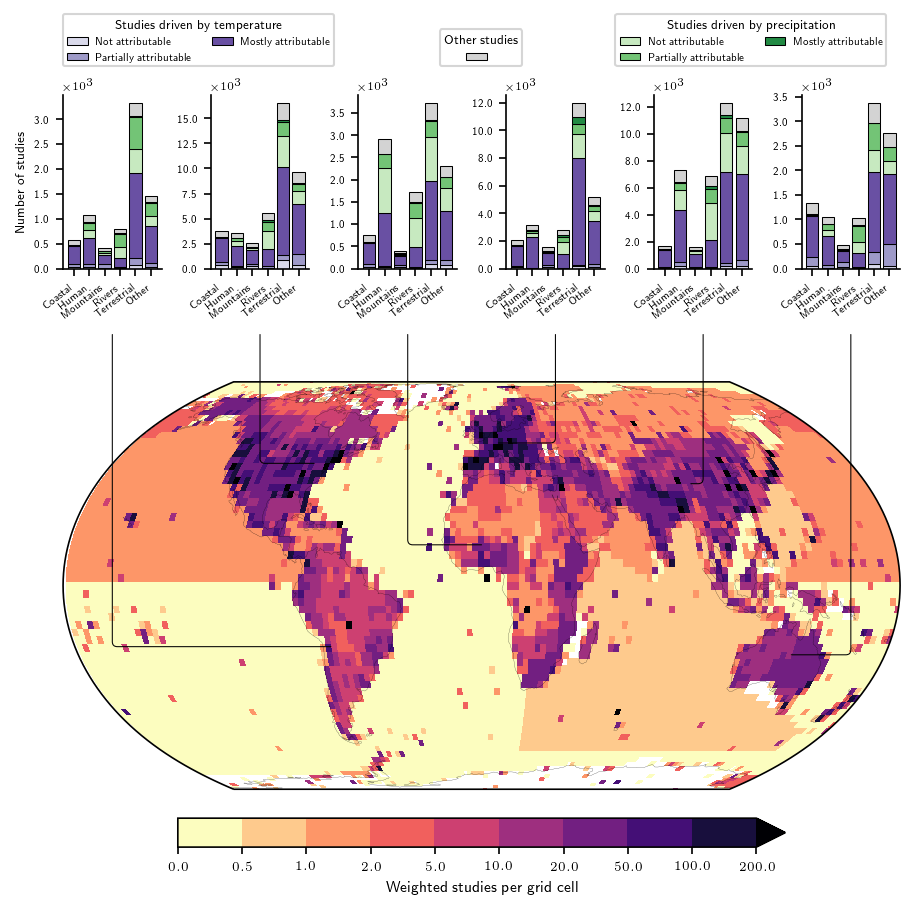

In [40]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch, ConnectionStyle

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

colors = ["Reds","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]


lw = 0.5

cols = 2

fig = plt.figure(dpi=150,figsize=(7.2,6))

gs = gridspec.GridSpec(3, 6, height_ratios=[.1, .3, 1,], bottom=.05, top=.95, wspace=.5, hspace=0.00)

ax = plt.subplot(gs[2, :], projection=ccrs.EqualEarth())


n = np.array(df.all_study_prop).reshape(len(df.LAT.unique()), len(df.LON.unique()))
vm = n.max()
n[n==0] = np.nan

bounds = np.array([0,0.5,1,2,5,10,20,50,100,200])
cmap_mgm = plt.cm.get_cmap('magma_r',len(bounds))
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors[:-1], "")
cmap.set_over(colors[-1])

ax.coastlines(lw=0.1)
mesh = ax.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)-1,clip=False),
    #cmap=plt.cm.get_cmap('YlOrBr',vm/3-1), 
    #cmap = "YlOrBr",
    cmap = cmap,
#     norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
#     cmap=plt.cm.get_cmap('YlOrBr',12), 
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
cbar = plt.colorbar(mesh, orientation="horizontal", fraction=0.05, pad=0.05, extend="max")

cbar.set_label("Weighted studies per grid cell", fontsize=7)
cbar.ax.tick_params(labelsize=6)

continents = [
    "South America", 
    "North America", 
    "Africa", 
    "Europe", 
    "Asia",
    "Oceania"
]

continent_labels = [
    (0.32,0.35),
    (0.3,0.8),
    (0.5,0.6),
    (0.52,0.85),
    (0.75,0.75),
    (0.87,0.33),
]

#for ci, (continent, group) in enumerate(places.groupby('continent')):
    
for ci, continent in enumerate(continents):
    
    
    a = plt.subplot(gs[1,ci])
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a, angle=38)
    
    if ci==0:
        a.set_ylabel("Number of studies", fontsize=6)
    
    mxy = continent_labels[ci]
    xy = (0.5, -0.38)
    con = ConnectionPatch(xyA=xy, coordsA=a.transAxes,
                          xyB=mxy, coordsB=ax.transAxes,
                          connectionstyle=ConnectionStyle.Angle(angleA=90, rad=5),
                          linewidth=0.5
                         )
    fig.add_artist(con)
    
    
ax = plt.subplot(gs[0,:])

attrib_labels = [
    r"Not attributable",
    r"Partially attributable",
    r"Mostly attributable"
]

l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(.0,0.5),
    fontsize=5,
    ncol=2
)    
l0.set_title("Studies driven by temperature", prop={'size':6})

l1 = ax.legend(
    all_handles[2], [""], 
    loc=(.45,0.5),
    fontsize=5,
    ncol=2
)    
l1.set_title("Other studies", prop={'size':6})

l2 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(0.66,0.5),
    fontsize=5,
    ncol=2
)    
l2.set_title("Studies driven by precipitation", prop={'size':6})

plt.gca().add_artist(l0)
plt.gca().add_artist(l1)

ax.axis("off")
    
# plt.savefig('../figures/figure_3.png', dpi=300, bbox_inches="tight")
# plt.savefig('../figures/figure_3.svg', bbox_inches="tight")
# plt.savefig('../figures/figure_3.pdf', bbox_inches="tight")

South America
North America
Africa
Europe
Asia
Oceania


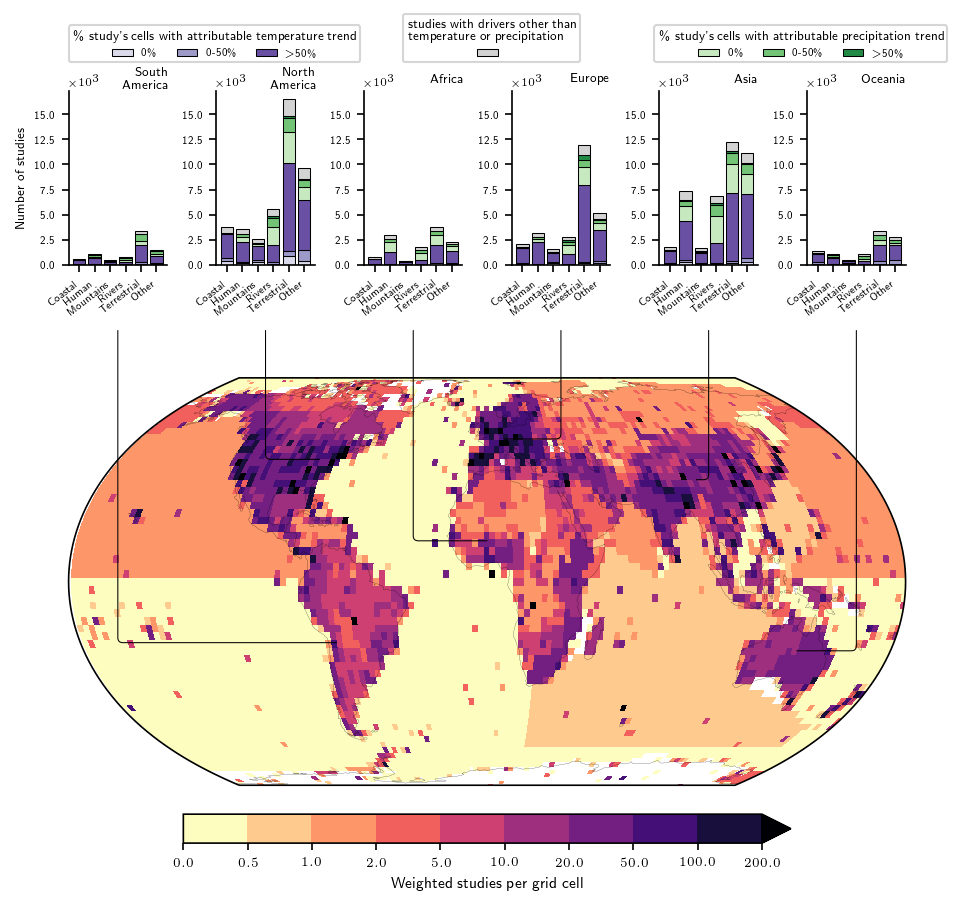

In [41]:
import matplotlib.gridspec as gridspec
from matplotlib.patches import ConnectionPatch, ConnectionStyle

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
})

colors = ["Reds","Greens","Oranges","Purples","Reds","PuRd","YlGnBu"]


lw = 0.5

cols = 2

fig = plt.figure(dpi=150,figsize=(7.2,6))

gs = gridspec.GridSpec(3, 6, height_ratios=[.1, .3, 1,], bottom=.05, top=.95, wspace=.5, hspace=0.00)

ax = plt.subplot(gs[2, :], projection=ccrs.EqualEarth())


n = np.array(df.all_study_prop).reshape(len(df.LAT.unique()), len(df.LON.unique()))
vm = n.max()
n[n==0] = np.nan

bounds = np.array([0,0.5,1,2,5,10,20,50,100,200])
cmap_mgm = plt.cm.get_cmap('magma_r',len(bounds))
colors = list(cmap_mgm(np.arange(len(bounds))))
cmap = mpl.colors.ListedColormap(colors[:-1], "")
cmap.set_over(colors[-1])

ax.coastlines(lw=0.1)
mesh = ax.pcolormesh(
    df.LON.unique(),#-degrees*0.5,
    df.LAT.unique(),#-degrees*0.5,
    n,
    
    norm = mpl.colors.BoundaryNorm(bounds,ncolors=len(bounds)-1,clip=False),
    #cmap=plt.cm.get_cmap('YlOrBr',vm/3-1), 
    #cmap = "YlOrBr",
    cmap = cmap,
#     norm = mpl.colors.LogNorm(vmin=0.1, vmax=vm),
#     cmap=plt.cm.get_cmap('YlOrBr',12), 
    transform=ccrs.PlateCarree(),
    #shading="gouraud"
)
cbar = plt.colorbar(mesh, orientation="horizontal", fraction=0.05, pad=0.05, extend="max")

cbar.set_label("Weighted studies per grid cell", fontsize=7)
cbar.ax.tick_params(labelsize=6)

continents = [
    "South America", 
    "North America", 
    "Africa", 
    "Europe", 
    "Asia",
    "Oceania"
]

continent_labels = [
    (0.32,0.35),
    (0.3,0.8),
    (0.5,0.6),
    (0.52,0.85),
    (0.75,0.75),
    (0.87,0.33),
]

#for ci, (continent, group) in enumerate(places.groupby('continent')):
    
for ci, continent in enumerate(continents):
    
    if ci==0:
        a = plt.subplot(gs[1,ci])
        fa = a
    else:
        a = plt.subplot(gs[1,ci],sharey=fa)
        
    a.set_title(continent.replace(' ','\n'), fontsize=6, loc="right",va="center")
    
    all_handles = plot_continent_docs(continent, doc_continents, df_studies, sector_cols, a, angle=38)
    
    if ci==0:
        a.set_ylabel("Number of studies", fontsize=6)
    
    mxy = continent_labels[ci]
    xy = (0.5, -0.38)
    con = ConnectionPatch(xyA=xy, coordsA=a.transAxes,
                          xyB=mxy, coordsB=ax.transAxes,
                          connectionstyle=ConnectionStyle.Angle(angleA=90, rad=5),
                          linewidth=0.5
                         )
    fig.add_artist(con)
    
    
ax = plt.subplot(gs[0,:])

attrib_labels = [
    "0\%",
    "0-50\%",
    r"\textgreater50\%"
]

l0 = ax.legend(
    all_handles[0], attrib_labels, 
    loc=(.0,0.5),
    fontsize=5,
    ncol=3
)    
l0.set_title("\% study's cells with attributable temperature trend", prop={'size':6})

l1 = ax.legend(
    all_handles[2], [""], 
    loc=(.4,0.5),
    fontsize=5,
    ncol=3
)    
l1.set_title("studies with drivers other than \ntemperature or precipitation", prop={'size':6})

l2 = ax.legend(
    all_handles[1], 
    attrib_labels, 
    loc=(0.7,0.5),
    fontsize=5,
    ncol=3
)    
l2.set_title("\% study's cells with attributable precipitation trend", prop={'size':6})

plt.gca().add_artist(l0)
plt.gca().add_artist(l1)

ax.axis("off")
    
plt.savefig('../figures/figure_3.png', dpi=300, bbox_inches="tight")
plt.savefig('../figures/figure_3.svg', bbox_inches="tight")
plt.savefig('../figures/figure_3.pdf', bbox_inches="tight")